<a href="https://colab.research.google.com/github/Floral107/Mesterseges-intelligencia/blob/main/konv_neuralis_halo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

B1. Feladatbeadás
Ebben a házi feladatban a cél divatcikkek osztályzása lesz kép alapján neurális hálózat segítségével.

B1.1 Feladatleírás
Az adathalmaz itt érhető el. Ugyanitt található róla egy rövid leírás is. A szürkeárnyalatos képeken láthatóak cipők, ruhák, pólók, táskák, amelyek a Zalandotól (divatcikk kiskereskedő) származnak. A cél, hogy minél pontosabb legyen a predikció, amit accuracy alapján határozunk meg.

A tanító (train) adathalmaz elérhető a fenti oldalon (képek: train-images-idx3-ubyte.gz, címkék: train--images--idx3--ubyte.gz, betöltés így), vagy akár könyvtár segítségével is betölthetjük, pl. TensorFlow-ból így (ez a javasolt megoldás). A teszt adathalmazt a moodle-ről lehet letölteni. Az adathalmaz linkje a moodle-ben a házi feladat alatt található a "Dataset assignment"-nél (ami egy 0 pontos quiz). Link a Moodle-hoz
A teszt adathalmazt a következő módon lehet betölteni pythonban:

x_test = np.load('x_test_xyz.npy')
A pontozás accuracy (pontosság) alapján történik: 0.7 és 0.95 között lineáris, ezen kívül pedig nearest neighbor interpolációval határozzuk meg.

B1.2 Beadandó
A moodle felületre egy .npy fájlt kell feltölteni a prediktált értékekkel, tehát egy 1D integer vektort az osztályok indexével. Ezt python környezetben a numpy segítségével a np.save függvénnyel tehetjük meg könnyen.

np.save('y_test.npy', y_test)
B1.3 Hasznos tudnivalók
Megoldási környezet
A javasolt megoldási környezet a Google Colaboratory, ahol iPython notebookokat lehet futtatni. A neurális hálózat felépítéséhez és tanításához pedig ajánlott a TensorFlow környezetet használni.

Fájlok
A moodle-ről letöltött x_test_xxxxxx.npy tartalmazza a teszt adathalmazt, azaz  9000  db ( 28×28 )-as képet egy ( 9000×28×28 )-as tenzorban.

Adat előfeldolgozása
A neurális hálózatok könnyebben tanulnak, ha az adat normalizálva van. Ez képek esetén jellemzően annyit jelent, hogy a (0-1) tartományba visszük a kép csatornáinak intenzitásértékeit.

Beadás:

https://edu.vik.bme.hu/mod/quiz/view.php?id=150967

hf:

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7100 - loss: 0.7955 - val_accuracy: 0.8561 - val_loss: 0.3941 - learning_rate: 0.0010
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8630 - loss: 0.3650 - val_accuracy: 0.8835 - val_loss: 0.3257 - learning_rate: 0.0010
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8895 - loss: 0.2978 - val_accuracy: 0.8961 - val_loss: 0.2943 - learning_rate: 0.0010
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9028 - loss: 0.2644 - val_accuracy: 0.9063 - val_loss: 0.2630 - learning_rate: 0.0010
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9145 - loss: 0.2340 - val_accuracy: 0.9068 - val_loss: 0.2498 - learning_rate: 0.0010
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9195 - loss: 0.2150 - val_accuracy: 0.8994 - val_loss: 0.2848 - learning_rate: 0.0010
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9278 -

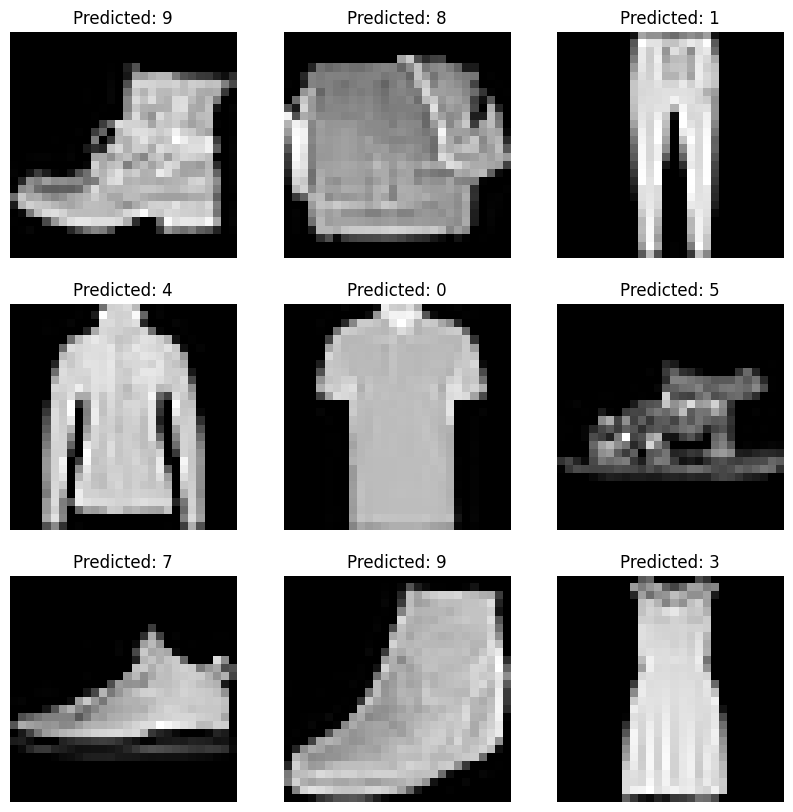

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Conv2D, Dense, Input, MaxPooling2D, Dropout
from tensorflow.keras import Model

X_test = np.load('x_test_70efdf.npy')
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizálás
train_images = train_images / 255.0
test_images = test_images / 255.0
X_test = X_test / 255.0

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# TODO
input = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), padding='same', activation='relu')(input)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Második konvolúciós és pooling réteg
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Harmadik konvolúciós és pooling réteg
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Negyedik konvolúciós és pooling réteg
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)


# Kilapítás (Flatten)
x = Flatten()(x)

# Teljesen összekötött (Dense) rétegek
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

output = Dense(10, activation='softmax')(x)

# TODO

model = Model(inputs=input, outputs=output, name='dvc_classification_model')

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks=([callback], [early_stopping]))

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

y_pred_logits = model.predict(X_test)  # Get logits from the model
y_pred = np.argmax(y_pred_logits, axis=1)  # Convert logits to class indices

y_pred = np.array(y_pred, dtype=np.uint8)  # Convert to 8-bit unsigned integers
np.save('y_test.npy', y_pred, allow_pickle=False)

# Optionally, display some test images and their predicted labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}')
    plt.axis('off')
plt.show()
